** -----------------------------Classification avec des reseaux de neurones  entierement connectes------------------------ ́**

In [351]:
from sklearn.datasets import make_circles,make_blobs
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.svm import SVC
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



**1 -Binary Classification with fully conected neural network**


connectes**

**1.1 Dataset preparation** 
--------------------------

In [363]:
X,Y=make_circles(n_samples=100,noise=0.03,random_state=43)

In [364]:
print(f"the generated samples:{X} \n and the target {Y}")

the generated samples:[[-0.85359827  0.60320912]
 [ 0.99413689  0.27745009]
 [-0.32781152  0.96029445]
 [-0.92962032  0.38887051]
 [ 0.52328506  0.61911898]
 [ 0.28487315 -0.72885904]
 [-0.57984861  0.52679451]
 [ 0.63913833  0.43125145]
 [ 0.17774815  0.99746331]
 [-0.63837356 -0.41578422]
 [ 0.42506007  0.87598298]
 [ 0.06001353 -1.00473869]
 [-0.22222683 -0.73162163]
 [ 1.00488454 -0.00343476]
 [ 0.1854991  -0.78043605]
 [-0.01729727  0.94900577]
 [ 0.86247612  0.56925342]
 [ 0.95952272  0.12399063]
 [ 0.61230252 -0.45316002]
 [-0.44254075 -0.66684169]
 [ 0.69964847 -0.69122019]
 [ 0.06569847  0.9923752 ]
 [-0.69607312 -0.27692532]
 [ 0.58928516 -0.60333331]
 [-0.05144484 -0.96094252]
 [ 0.40796228 -0.68141298]
 [ 0.65304899 -0.33186843]
 [ 0.52065372  0.55076133]
 [-0.05473942  0.79524689]
 [ 0.86319806 -0.45117958]
 [ 0.4988427   0.84210419]
 [-0.51793512 -0.8497097 ]
 [ 0.80629314 -0.61253764]
 [-0.73901771  0.70609763]
 [-0.24796518  0.97754638]
 [ 0.49241274 -0.61851979]
 [-0.7

In [192]:
print(f"dimension d'entrée {np.shape(X)} \ndimension de sortie {np.shape(Y)}")

dimension d'entrée (1000, 2) 
dimension de sortie (1000,)


Text(0, 0.5, 'feature 2')

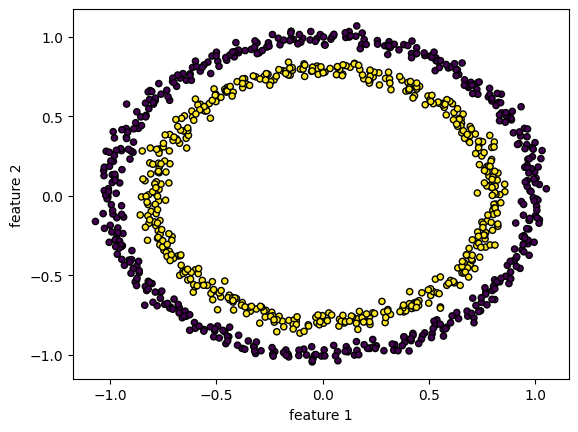

In [193]:
##Data VIZ
plt.scatter(X[:,0],X[:,1],s=20,c=Y, edgecolors='k')
plt.xlabel("feature 1")
plt.ylabel("feature 2")




---
==> ces données necessite une fonction non linéaire elles ne sont pas séparable avec une simple fonction linéaire.



---





In [194]:
## transform data from array to torch
X = torch . from_numpy (X) . type ( torch . float )
y = torch . from_numpy (Y) . type ( torch . float )

In [195]:
type(X)

torch.Tensor

In [196]:
##split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
print(f"shape of train and test  data\n X_train:{np.shape(X_train)}\n y_train:{np.shape(y_train)}\n X_test:{np.shape(X_test)}\n y_test:{np.shape(y_test)}")

shape of train and test  data
 X_train:torch.Size([800, 2])
 y_train:torch.Size([800])
 X_test:torch.Size([200, 2])
 y_test:torch.Size([200])


**1.2  FCNN classifier** 
--------------------------

In [198]:
##prepare the device
device = " cuda " if torch . cuda . is_available () else "cpu"

In [199]:
class ModelV0 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
        # Constructeur pour definir l’ architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =5)
        self . layer_2 = nn . Linear ( in_features =5, out_features =1)

        # Propagation des donnees dans le modele
    def forward ( self , x):
        return self . layer_2 ( self . layer_1 (x ))

In [200]:
## create an instance of the model and send it to the execution device
model_0 = ModelV0 () . to ( device )

In [201]:
##print layers using named_children or simply print(model_v0)
for name, layer in model_0.named_children():
    print(name, layer)

layer_1 Linear(in_features=2, out_features=5, bias=True)
layer_2 Linear(in_features=5, out_features=1, bias=True)


------------------------------------------------------------------
**le choix des dimensions d'éntrée et de sortie du FCNN**

le choix des dimensions nécessite une bonne compréhension des données et de la tache visée, pour les données d'entrée elles doivent correspondre au nombre des features de nos données dans notre cas = 2, et pour les données de sorties ca dépend plutot du task et son objectif souhaité.

-----------------------------------------------------------------------------------------------------------------------------------
**La couche 1 prend 2 features en entrée et produit 5 features en sortie. C’est ce qu’on appelle avoir 5 unités cachées (neurones).**

cette couche transforme les données de 2 features à 5 features pour en dégager des motifs plus complexes en fesant des combinaisons non linéaires.

-------------------------------------------------------
**Le choix des nombres de neurones par couche cachée**
le choix des nombres de neurones par couche est une étape trés importante qui a un effet direct sur la performance du modéle. 
Ce choix peut etre effectuée suivant plusieurs pratiques ::
    

   😊 La connaissance des problémes similaires.

   😊 La compréhension des données permet de nous renseigner sur la complexité du probléme et par suite le choix des nombres de neurones qui doit etre elevé si le probléme est trés complexes.

   😊On peut meme tester plusieurs configurations.



-------------------------------------------------------------
**dans notre modéle la couche 2 a 5 feature d'éntrée**

Tout simplement car la couche cachée a 5 features de sortie.

In [202]:
## Define the loss function, and the SGD optimizer
loss_fn = nn . BCEWithLogitsLoss ()
optimizer = torch . optim . SGD ( params = model_0 . parameters () , lr =0.1)

-----------------------------------------------------------------
**Différence entre  torch.nn.BCELoss() et torch.nn.BCEWithLogitsLoss().**

Ces deux méthodes permettent de calculer l'entropie croisée binaire.

BCELoss: lorsque les valeurs de sortie du modèle sont déjà passées à travers une fonction sigmoïde. (sortie == sont des probabiités)

BCEWithLogitsLoss: lorsque les valeurs de sortie du modèle ne sont pas encore passées à travers une fonction sigmoïde. 

**1.3 Model Training** 
--------------------------

In [203]:
## Define the accuracy function
def accuracy_fn ( y_true , y_pred ) :

  cor_pred=(y_true==y_pred).sum().float() ## number of correctly classfifies classes
  accuracy=cor_pred/len(y_true) 

  return accuracy

In [204]:
torch . manual_seed (42)

epochs = 100

 # Envoyer le dataset a l appareil d execution
X_train , y_train = X_train . to ( device ) , y_train . to ( device )
X_test , y_test = X_test . to ( device ) , y_test . to ( device )


for epoch in range ( epochs ):
  ## activate the training mode
  model_0 . train ()

  ## Calculate logits == scores before passing to the sigmoid function
  y_logits = model_0 ( X_train ). squeeze ()

  ## transform logits to probability
  y_pred = torch . round ( torch . sigmoid ( y_logits ))

  ## claculate the loss
  loss = loss_fn ( y_logits , y_train )
  acc = accuracy_fn ( y_true = y_train , y_pred = y_pred )

  ## update the gradient params
  optimizer . zero_grad ()

  loss . backward ()

  ##update weights using gradient in retropropagation
  optimizer . step ()

  ## no more update for weights 
  model_0 . eval ()

  ## activate the inference mode and calculate loss and accuracy for test set
  with torch . inference_mode () :
    test_logits = model_0 ( X_test ) . squeeze ()
    test_pred = torch . round ( torch . sigmoid ( test_logits ))
    test_loss = loss_fn ( test_logits , y_test )
    test_acc = accuracy_fn ( y_true = y_test , y_pred = test_pred )

In [205]:
print(f"loss : {loss} \naccuracy : {acc}\ntest_loss : {test_loss} \ntest_acc : {test_acc}")
print(y_pred)

loss : 0.693220853805542 
accuracy : 0.5137500166893005
test_loss : 0.6943637132644653 
test_acc : 0.5
tensor([1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1

==> le modéle n'est pas assez performant et ca c'est du au choix de l'architecture car nos données sont trops complexes par rapport a l'architecture

**1.3 Model Evaluation** 
--------------------------

In [206]:
def plot_Decision_boundary(X,Y,ax):
  # Create a grid of points to plot the decision boundary
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  grid = np.c_[xx.ravel(), yy.ravel()]
  grid_tensor = torch.tensor(grid, dtype=torch.float32, device=device)

  # Compute predictions for the grid
  model_0.eval()
  with torch.no_grad():
      pred_grid = model_0(grid_tensor).squeeze().cpu().numpy()
  pred_grid = np.round(1 / (1 + np.exp(-pred_grid)))
  
  # Reshape the predictions to the shape of the grid
  pred_grid = pred_grid.reshape(xx.shape)
  

  # Plot the decision boundary and the data points
  ax.contourf(xx, yy, pred_grid,  alpha=0.6)
  ax.scatter(X[:, 0], X[:, 1], c=Y)
  #ax.show()





Text(0.5, 1.0, 'decision boundary for test set')

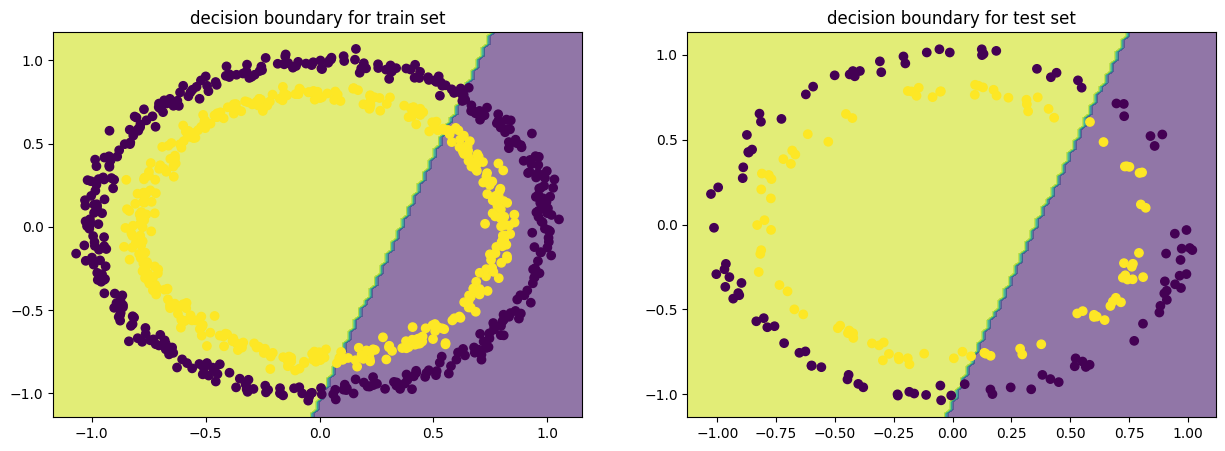

In [207]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plot_Decision_boundary(X_train,y_train,axes[0])
axes[0].set_title("decision boundary for train set")
plot_Decision_boundary(X_test,y_test,axes[1])
axes[1].set_title("decision boundary for test set")

==> Ce modéle est tellement simple qu'il n'a pas put dégager des patterns complexes 

-------------------------------------------------------
* il existe plusieurs techniques qui permettent d'améliorer la performances du modéle:

    * augmentation des données.
    * réglage des hyperparamétres.
    * augmenter le nombre des couches
    * augmenter le nombre des neurones par couche
    * ajouter des fonctions d'activation pour eleminer la linearité
    * augmenter le nombre d'epochs

In [208]:
class ModelV1 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
        # Constructeur pour definir l’ architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =5)
        self . layer_2 = nn . Linear ( in_features =5, out_features =1)

        # Propagation des donnees dans le modele
    def forward ( self , x):
         x = F.sigmoid(self.layer_1(x))
         x = F.sigmoid(self.layer_2(x))
         return x



In [209]:
## create an instance of the model and send it to the execution device
model_new = ModelV1 () . to ( device )

**2 Classification multi-classes avec des reseaux de neurones entierement
connectes**

**2.1 Data prep**

In [342]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4,random_state=42)


In [343]:
X_t = torch.from_numpy(X).type(torch.float)
y_t = torch.from_numpy(y).type(torch.float)

In [344]:

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

Text(0, 0.5, 'feature 2')

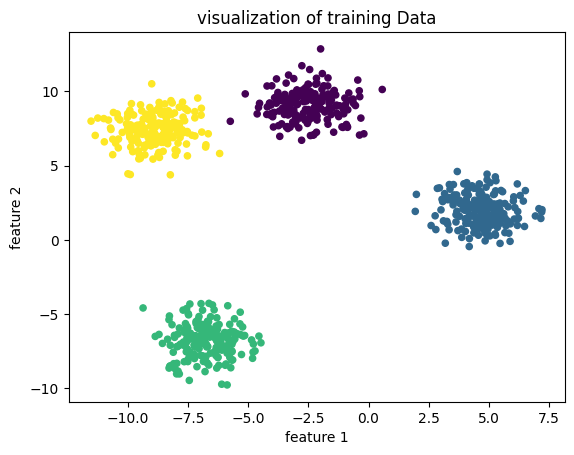

In [346]:
plt.scatter(X_train[:,0],X_train[:,1],s=20,c=y_train)
plt.title('visualization of training Data')
plt.xlabel("feature 1")
plt.ylabel("feature 2")


==> c'est trés claires que ces données sont trés complexes donc ca necessite 


In [347]:
class ModelV1 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
 # Constructeur pour definir l’ architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =10)
        self . layer_2 = nn . Linear ( in_features =10 , out_features =4)
       

 # Propagation des donnees dans le modele
    def forward(self, x):
        x = self.layer_1(x)
        ##non linear function
        x = nn.functional.relu(x)
        x = self.layer_2(x)
        return x

In [348]:
model_1 = ModelV1 () . to ( device )

In [349]:
import torch.nn.functional as F
torch.manual_seed(42)
# Define the Loss function
loss_fn = nn.CrossEntropyLoss()
## Define the optimizer
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

# epochs number
n_epochs = 100



for epoch in range(n_epochs):
    # activate training mode
    model_1.train()
    
    # calculate logits
    train_logits = model_1(X_train)

    # loss and accuracy 
    train_loss = loss_fn(train_logits, y_train.long())
    acc = accuracy_fn ( y_true = y_train , y_pred = train_logits.argmax(dim=1) )

     # Update the gradient 
    optimizer.zero_grad()

    # Calulate the gradient using retroprog
    train_loss.backward()

    # update weights
    optimizer.step()

    # mode evaluation
    model_1.eval()

    # logits for test
    test_logits = model_1(X_test)

     # Loss for test
    test_loss = loss_fn(test_logits, y_test.long())
    test_loss=test_loss.item()
    test_acc = accuracy_fn ( y_true = y_test , y_pred = test_logits.argmax(dim=1) )
    test_acc=test_acc.item()
    
    train_loss=train_loss.item()
    acc=acc.item()
    if (epoch + 1) % 10 == 0:
        print ('acc de l',epoch+1,'=',acc*100,'loss =',train_loss)
        print ('test_acc de l epoch',epoch+1,'=',test_acc*100,'loss du test',test_loss)


acc de l 10 = 75.74999928474426 loss = 0.8181198835372925
test_acc de l epoch 10 = 71.49999737739563 loss du test 0.8182851672172546
acc de l 20 = 99.12499785423279 loss = 0.42099764943122864
test_acc de l epoch 20 = 99.50000047683716 loss du test 0.4287424087524414
acc de l 30 = 99.75000023841858 loss = 0.30657467246055603
test_acc de l epoch 30 = 100.0 loss du test 0.3200959861278534
acc de l 40 = 99.87499713897705 loss = 0.2543107271194458
test_acc de l epoch 40 = 100.0 loss du test 0.26730015873908997
acc de l 50 = 99.87499713897705 loss = 0.21543127298355103
test_acc de l epoch 50 = 100.0 loss du test 0.22423581779003143
acc de l 60 = 99.87499713897705 loss = 0.1872210055589676
test_acc de l epoch 60 = 100.0 loss du test 0.19578421115875244
acc de l 70 = 99.87499713897705 loss = 0.16515862941741943
test_acc de l epoch 70 = 100.0 loss du test 0.17336784303188324
acc de l 80 = 99.87499713897705 loss = 0.14591974020004272
test_acc de l epoch 80 = 100.0 loss du test 0.1526568233966827

In [ ]:
y_pred = test_logits.argmax(dim=1)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test,y_pred)


print("Precision = ", precision)
print("Rappel = ", recall)
print("F1 score = ", f1)
print("Confusion matrix = ")
print(confusion)

In [324]:

x1,y1=make_blobs(n_samples=1000, n_features=2, centers=4)

In [325]:
X1= torch . from_numpy (x1) . type ( torch . float )
Y1= torch . from_numpy (y1) . type ( torch . float )

In [326]:
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=60)

Text(0, 0.5, 'feature 2')

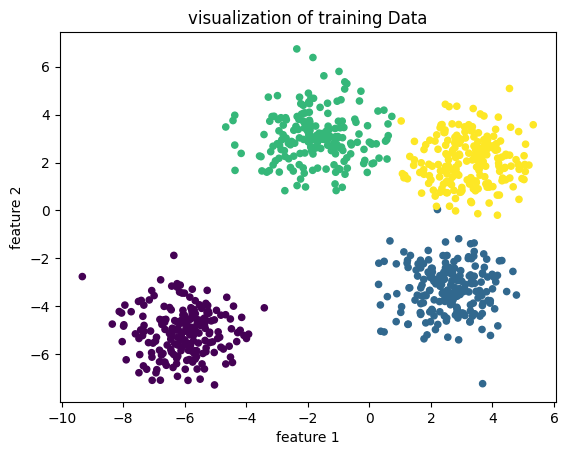

In [329]:
##Data VIZ
plt.scatter(X_train[:,0],X_train[:,1],s=20,c=y_train)
plt.title('visualization of training Data')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

==> c'est trés claires que ces données sont trés complexes donc ca necessite une fonction non lineaires pour avoir les séparer

**Performance Evaluation**

In [352]:
y_pred = test_logits.argmax(dim=1)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test,y_pred)


print(f"Precision : {precision}\n recall : {recall}\n F1 score :{f1}\n confusion matrix:{confusion}")


Precision : 1.0
 recall : 1.0
 F1 score :1.0
 confusion matrix:[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


==> lors de l'evaluation d'un modele c'est necessaire d'utiliser plusieurs métriques pour évaluer le modéle ▶
  * Précision : La précision mesure le nombre de prédictions positives correctes par rapport au nombre total de prédictions positives effectuées par le modèle. La précision est utile dans les situations où les fausses prédictions positives sont coûteuses

  * Rappel : Le rappel mesure le nombre de prédictions positives correctes par rapport au nombre total d'exemples positifs dans les données. Le rappel est utile dans les situations où les fausses prédictions négatives sont coûteuses

  * Score F1 : Le score F1 est une mesure combinée de la précision et du rappel qui donne une indication globale de la qualité des prédictions. Le score F1 est utile pour les problèmes de classification binaire lorsque les deux classes ont la même importance.

  * Matrice de confusion : La matrice de confusion est un tableau qui montre le nombre de prédictions correctes et incorrectes pour chaque classe.

**Decision Boundary**


In [355]:
def plot_dec_boun(X_train,y_train,ax):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = model_1(torch.from_numpy(grid).type(torch.float).to(device)).detach().cpu().numpy()
    Z = np.argmax(Z, axis=1)


    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')


Text(0.5, 1.0, 'decision boundary for test set')

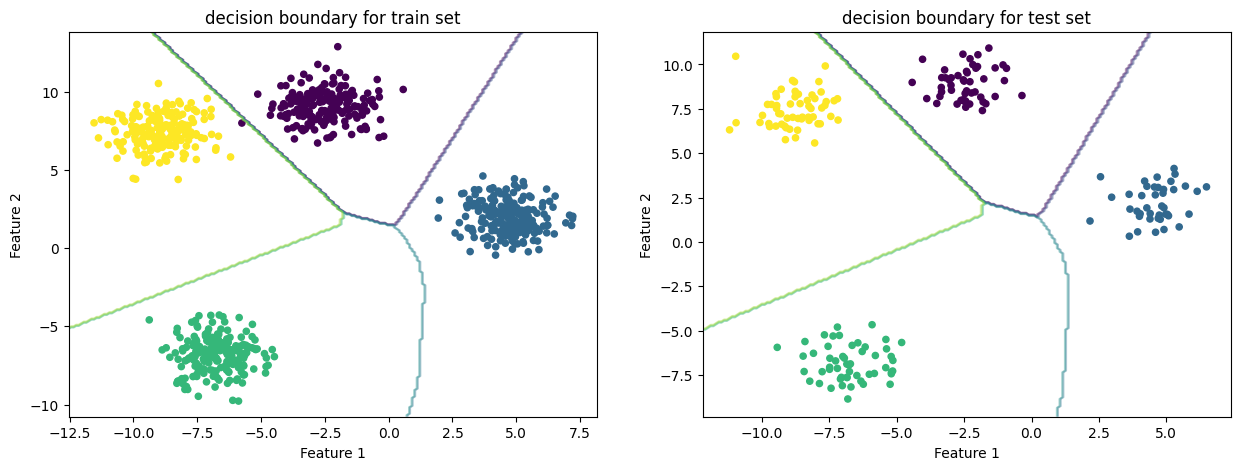

In [358]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plot_dec_boun(X_train,y_train,axes[0])
axes[0].set_title("decision boundary for train set")
plot_dec_boun(X_test,y_test,axes[1])
axes[1].set_title("decision boundary for test set")

**2.10 l’impact de l’augmentation du nombre d’ ́echantillons dans le dataset sur l’exactitude de classification**
L'augmentation du nombre d'échantillons dans le dataset peut avoir un impact positif sur l'exactitude de classification de votre modèle. 
  * Le modéle peut se genraliser
  * Réduire les effets du overfitting
Néanmoins elle peut avoir des effets négatifs:
  * Si les echantillons ajoutées contiennet des des données  redondantes ou mal étiquetées

  ==> donc il faut avoir un équilibre

**2.11  l’impact du choix de l’optimiseur, de la fonction de perte et des fonctions d’activation sur l’exactitude de classification.**

  * les optimizers possede  des taux d'apprentissage et des valeurs de momentum différents, ce qui peut avoir un impact sur la vitesse et la précision de la convergence du modèle.
  *  La fonction de perte est utilisée pour calculer l'erreur entre les prédictions du modèle et les étiquettes réelles. Les différentes fonctions de perte ont des comportements différents et sont adaptées à différents types de problèmes.
  *  Les fonctions d'activation sont utilisées pour introduire de la non-linéarité dans les modèles de réseaux de neurones, ce qui peut aider à modéliser des relations complexes entre les caractéristiques et les étiquettes de classification. 
  ==> Finalement le choix dépend de la complexité du modéle et de l'objectif visé

**2.12 les principaux defis li es a l’utilisation de FCNN dans des applications du monde reel ?**
  * Overfitting
  * temps de calcul 
  * besoin de données grandes et  de haute qualité 
  
**Comment peut-on surmonter ces defis ?**

  * Utilisation des techniques de régularisation
  * Collecte des données de qualité
  * Optimisation des paramétres(Taux d'apprentissage)

**2.13 Comment peut-on utiliser les modeles de classification bases sur FCNN pour resoudre des problemes du monde r ́eel, tels que la d ́etection de fraudes ou la reconnaissance de visages ?**

les modèles de classification basés sur les FCNN peuvent être utilisés pour résoudre de nombreux problèmes du monde réel, à condition de suivre les étapes appropriées pour collecter, prétraiter et entraîner les données, définir le modèle, évaluer ses performances et l'utiliser pour prédire de nouvelles entrées,Par exemple, dans la détection des fraudes, le modèle peut être formé sur un grand ensemble de données de transactions passées pour identifier les modèles et les anomalies, puis utilisé pour détecter les transactions frauduleuses en temps réel. En reconnaissance faciale, le modèle peut être formé sur un grand ensemble de données de visages, puis utilisé pour identifier des individus dans des images ou des vidéos.
